In [1]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt

import re

In [2]:
df= pd.read_csv('TrustPilot_Cleaned_Doc_Term.csv')
print('Shape:', df.shape)
display(df.sample(3))

Shape: (6015, 501)


,UID,able,absolutely,accept,accepted,account,actually,add,address,advance,...,working,worse,worst,worth,would,wrong,year,yesterday,yet,zero
5634,TP_14059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4581,TP_12305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3961,TP_11074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
lda_data= df.drop(columns=['UID'])
lda_data.sample(3)

,able,absolutely,accept,accepted,account,actually,add,address,advance,ago,...,working,worse,worst,worth,would,wrong,year,yesterday,yet,zero
2501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Latent Dirichlet Allocation (LDA)

Inspirations for topics:

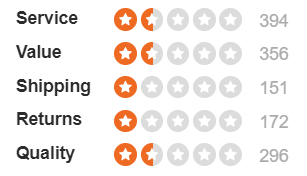   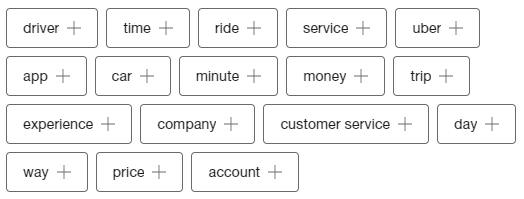

Shape [NO_DOCUMENTS, NO_TOPICS]: (6015, 5)
['ride' 'minute' 'time' 'trip' 'get' 'airport' 'price' 'car' 'charged'
 'pick' 'app' 'wait' 'way' 'never' 'would' 'fee' 'take' 'day' 'got' 'home']
['clean' 'friendly' 'courteous' 'time' 'nice' 'excellent' 'professional'
 'pleasant' 'car' 'polite' 'great' 'prompt' 'safe' 'helpful' 'vehicle'
 'good' 'ride' 'destination' 'comfortable' 'arrived']
['great' 'easy' 'service' 'good' 'friendly' 'use' 'experience' 'fast'
 'time' 'always' 'quick' 'awesome' 'app' 'thank' 'convenient' 'nice'
 'ride' 'best' 'reliable' 'using']
['customer' 'service' 'company' 'get' 'money' 'never' 'card' 'account'
 'phone' 'issue' 'app' 'back' 'ride' 'order' 'charge' 'would' 'support'
 'help' 'even' 'ha']
['nan' 'far' 'part' 'nothing' 'continue' 'ha' 'kind' 'new' 'seems' 'went'
 'best' 'pickup' 'drove' 'big' 'response' 'wait' 'price' 'good' 'every'
 'happy']


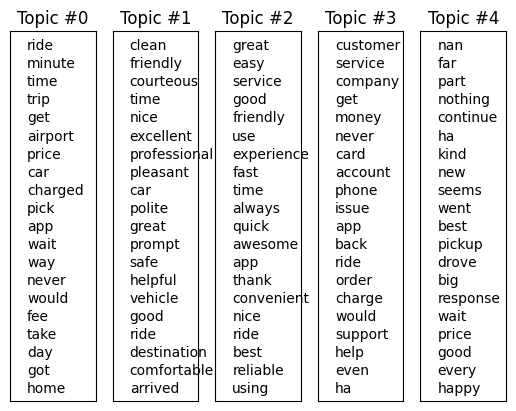

In [4]:
# Apply LDA
NUM_TOPICS= 5
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=100)
lda_Z_DF = lda_model.fit_transform(lda_data)
lda_model_5= lda_model
print("Shape [NO_DOCUMENTS, NO_TOPICS]:", lda_Z_DF.shape)

# Plot of major words in each topic
word_topic = np.array(lda_model.components_)
word_topic = word_topic.transpose()
ColumnNames = lda_data.columns

num_top_words = 20
vocab_array = np.asarray(ColumnNames)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 10

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    print(top_words)
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.2, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plt.tight_layout()
plt.show()
#plt.savefig("TopicsVis.pdf")

Shape [NO_DOCUMENTS, NO_TOPICS]: (6015, 4)
['clean' 'nice' 'friendly' 'time' 'courteous' 'car' 'polite' 'pleasant'
 'prompt' 'safe' 'professional' 'vehicle' 'ride' 'quick' 'comfortable'
 'helpful' 'arrived' 'destination' 'got' 'great']
['ride' 'get' 'time' 'service' 'minute' 'never' 'customer' 'app' 'trip'
 'charged' 'company' 'would' 'car' 'take' 'money' 'day' 'use' 'charge'
 'way' 'back']
['nan' 'fast' 'convenient' 'reliable' 'smooth' 'respond' 'option'
 'started' 'pretty' 'transportation' 'real' 'bit' 'ride' 'long' 'ask'
 'schedule' 'road' 'outside' 'top' 'door']
['great' 'experience' 'good' 'easy' 'excellent' 'service' 'friendly' 'use'
 'time' 'thank' 'always' 'awesome' 'professional' 'ride' 'personable'
 'app' 'felt' 'thanks' 'first' 'job']


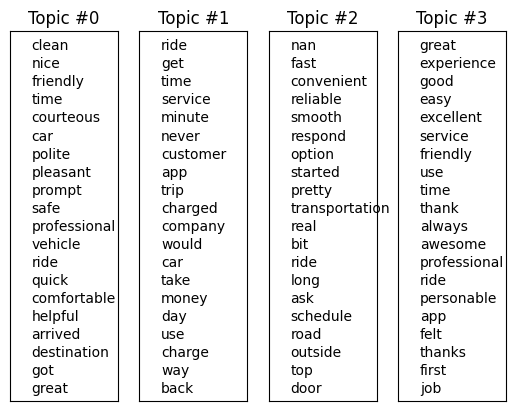

In [5]:
# Apply LDA
NUM_TOPICS= 4
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=100)
lda_Z_DF = lda_model.fit_transform(lda_data)
lda_model_4= lda_model
print("Shape [NO_DOCUMENTS, NO_TOPICS]:", lda_Z_DF.shape)

# Plot of major words in each topic
word_topic = np.array(lda_model.components_)
word_topic = word_topic.transpose()
ColumnNames = lda_data.columns

num_top_words = 20
vocab_array = np.asarray(ColumnNames)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 10

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    print(top_words)
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.2, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plt.tight_layout()
plt.show()
#plt.savefig("TopicsVis.pdf")

Shape [NO_DOCUMENTS, NO_TOPICS]: (6015, 3)
['ride' 'get' 'time' 'service' 'customer' 'never' 'app' 'trip' 'would'
 'charged' 'company' 'car' 'take' 'use' 'even' 'money' 'day' 'minute'
 'way' 'charge']
['nan' 'airport' 'pickup' 'minute' 'scheduled' 'early' 'within' 'flight'
 'arrived' 'showed' 'available' 'booked' 'wait' 'advance' 'schedule'
 'arrive' 'reservation' 'booking' 'appointment' 'morning']
['great' 'friendly' 'time' 'clean' 'good' 'nice' 'courteous'
 'professional' 'car' 'experience' 'ride' 'polite' 'safe' 'easy'
 'excellent' 'pleasant' 'service' 'helpful' 'prompt' 'vehicle']


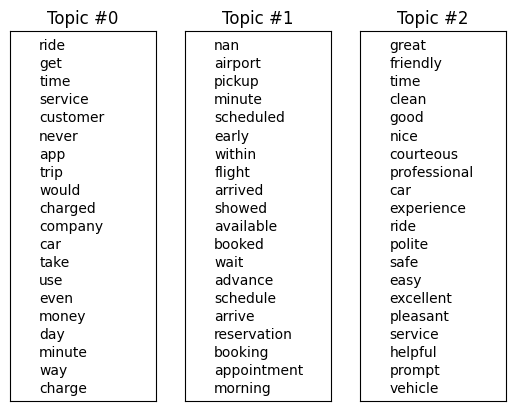

In [6]:
# Apply LDA
NUM_TOPICS= 3
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=100)
lda_Z_DF = lda_model.fit_transform(lda_data)
lda_model_3= lda_model
print("Shape [NO_DOCUMENTS, NO_TOPICS]:", lda_Z_DF.shape)

# Plot of major words in each topic
word_topic = np.array(lda_model.components_)
word_topic = word_topic.transpose()
ColumnNames = lda_data.columns

num_top_words = 20
vocab_array = np.asarray(ColumnNames)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 10

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    print(top_words)
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.2, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plt.tight_layout()
plt.show()
#plt.savefig("TopicsVis.pdf")

Shape [NO_DOCUMENTS, NO_TOPICS]: (6015, 2)
['ride' 'get' 'minute' 'service' 'time' 'app' 'customer' 'never' 'trip'
 'would' 'charged' 'company' 'way' 'like' 'use' 'take' 'money' 'airport'
 'even' 'day']
['nan' 'great' 'time' 'friendly' 'good' 'clean' 'nice' 'courteous'
 'experience' 'car' 'professional' 'polite' 'safe' 'ride' 'easy'
 'excellent' 'pleasant' 'service' 'vehicle' 'helpful']


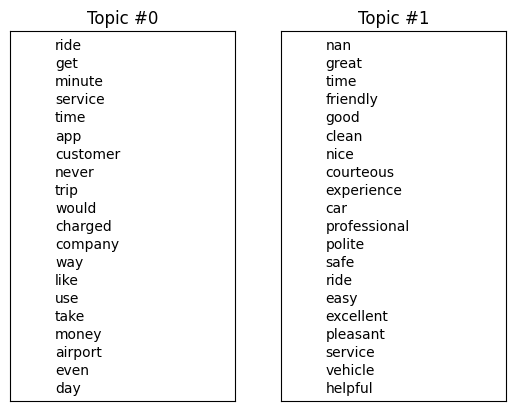

In [7]:
# Apply LDA
NUM_TOPICS= 2
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=100)
lda_Z_DF = lda_model.fit_transform(lda_data)
lda_model_2= lda_model
print("Shape [NO_DOCUMENTS, NO_TOPICS]:", lda_Z_DF.shape)

# Plot of major words in each topic
word_topic = np.array(lda_model.components_)
word_topic = word_topic.transpose()
ColumnNames = lda_data.columns

num_top_words = 20
vocab_array = np.asarray(ColumnNames)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 10

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    print(top_words)
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.2, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plt.tight_layout()
plt.show()
#plt.savefig("TopicsVis.pdf")

**Results Interpretation:**

Out of the above four topic modelling results, the one with 4 results seems reasonable.

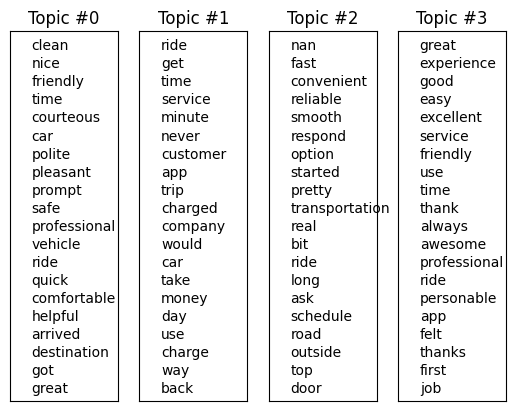

**Topic 1: Service Quality and Comfort**

* This topic may be discussing the quality of service provided by Uber drivers, focusing on aspects like cleanliness of vehicles, friendliness of drivers, professionalism, and overall comfort of the ride experience.

**Topic 2: Issues with Service and Payments**

* This topic seems to address issues related to Uber service and payments, including discussions about waiting times, customer service experiences, app functionality, and billing problems such as unexpected charges.

**Topic 3: Feedback on Convenience and Reliability**

* This topic likely discusses feedback on the convenience and reliability of Uber service, including discussions about fast and smooth rides, scheduling options, transportation choices, and experiences outside or on the road.

**Topic 4: Positive Experience and Appreciation**

* This topic likely revolves around positive experiences and appreciation for Uber service, highlighting ease of use, excellent service, friendliness of drivers, and overall satisfaction with the experience.

**Next Steps: Grouping based on content rather than emotions** 

Alternatelively a method to achieve topic modeling based on the topic of interest rather than emotions can be explored.

For example, 
* Sentence1: "I was happy about the early pickup" 
* Sentence2: "I was happy about how the car was comfortable"
* Sentence3: "I hated the ride. The ride was discomforting."

Sentence 1 and 2 should not be grouped (because they have same emotion), rather 2 and 3 should be together because they talk about ride quality.

**How to do it?**
* Try removing the sentiment related words NLTK's SentimentIntensityAnalyzer could be a good start

In [11]:
# Building an interactive plot of the 4 topic results
import pyLDAvis
from pyLDAvis import lda_model
import pickle
from scipy import sparse

# Loading the docterm matrix and vectorizer
DocTermMat = sparse.load_npz('doc_term_sparse.npz')
with open('vectorizer.pkl', 'rb') as f:
    DataVectorized = pickle.load(f)

pyLDAvis.enable_notebook() ## not using notebook
panel = lda_model.prepare(lda_model_4, DocTermMat, DataVectorized)
pyLDAvis.save_html(panel,"LDA_Output.html")

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# Assuming lda_model.fit_transform(lda_data) returns an array
lda_result = lda_model.fit_transform(lda_data)

# Save the result to a file
np.save('lda_result.npy', lda_result)

# Load the result from the file
loaded_lda_result = np.load('lda_result.npy')


In [14]:
# Storing the LDA models as pickle for future use

import pickle


with open('lda_model_2.pkl', 'wb') as f:
    pickle.dump(lda_model_2, f)
with open('lda_model_3.pkl', 'wb') as f:
    pickle.dump(lda_model_3, f)
with open('lda_model_4.pkl', 'wb') as f:
    pickle.dump(lda_model_4, f)
with open('lda_model_4.pkl', 'wb') as f:
    pickle.dump(lda_model_5, f)

"""# Load the trained model from the file
with open('lda_model.pkl', 'rb') as f:
    loaded_lda_model = pickle.load(f)

# Transform new data using the loaded model
loaded_lda_data = loaded_lda_model.transform(lda_data)
"""

"# Load the trained model from the file\nwith open('lda_model.pkl', 'rb') as f:\n    loaded_lda_model = pickle.load(f)\n\n# Transform new data using the loaded model\nloaded_lda_data = loaded_lda_model.transform(lda_data)\n"